Matplotlib is building the font cache; this may take a moment.
/var/folders/px/59s21xzx7b5gx1szbr4bgzsm0000gn/T/ipykernel_52988/4268736062.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range("2024-01-01", periods=30*24*60, freq="T")  # "T" = minute
/var/folders/px/59s21xzx7b5gx1szbr4bgzsm0000gn/T/ipykernel_52988/4268736062.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_clicks = df.resample("H").sum()


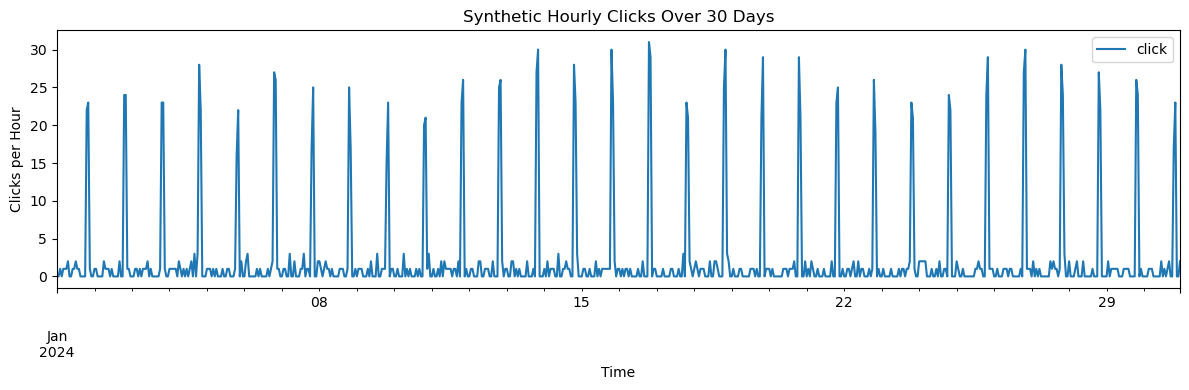

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate 30 days of click data, per minute
date_range = pd.date_range("2024-01-01", periods=30*24*60, freq="T")  # "T" = minute
clicks = []

for ts in date_range:
    hour = ts.hour
    # Add higher probability of clicks between 19:30 to 20:30 (spike)
    if 19 <= hour <= 20:
        prob = 0.4
    else:
        prob = 0.01
    clicks.append(np.random.binomial(n=1, p=prob))  # 0 or 1 click per minute

df = pd.DataFrame({"timestamp": date_range, "click": clicks})
df.set_index("timestamp", inplace=True)

# Resample to hourly click counts
hourly_clicks = df.resample("H").sum()

# Plot
hourly_clicks.plot(title="Synthetic Hourly Clicks Over 30 Days", figsize=(12, 4))
plt.xlabel("Time")
plt.ylabel("Clicks per Hour")
plt.tight_layout()
plt.show()

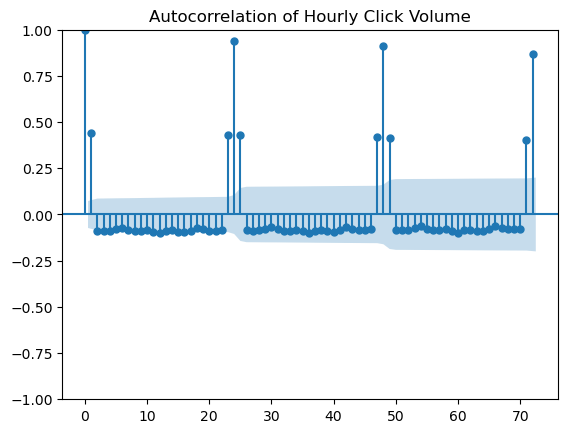

In [6]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(hourly_clicks, lags=72)  # ~3 days worth of hourly lags
plt.title("Autocorrelation of Hourly Click Volume")
plt.show()

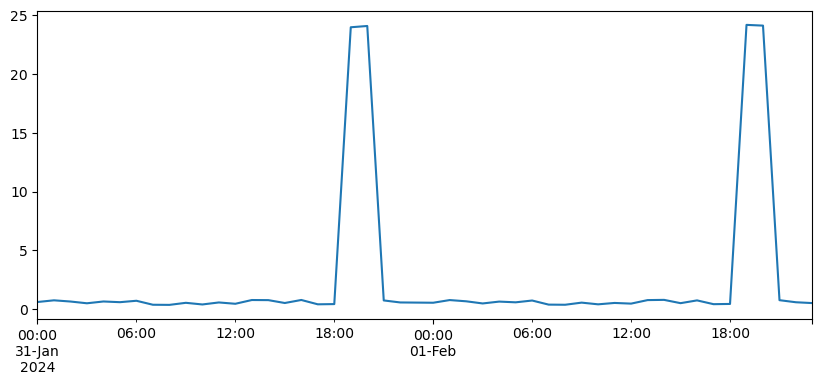

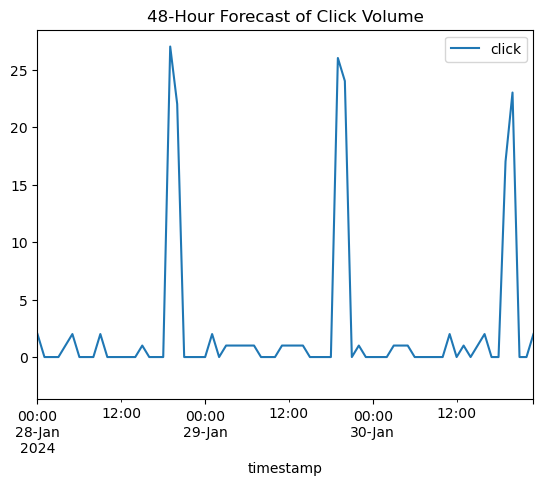

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(hourly_clicks, order=(1, 0, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit(disp=False)

forecast = results.get_forecast(steps=48)
forecast_ci = forecast.conf_int()

forecast.predicted_mean.plot(label='Forecast', figsize=(10, 4))
hourly_clicks[-72:].plot(label='Observed')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title("48-Hour Forecast of Click Volume")
plt.show()